In [1]:
import utils
import evaluator
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_colwidth', -1)
%matplotlib inline

experiment_id = 'da_en_vi_no_int_largest_range_200000_short_casefolded' 
lang_codes_to_evaluate = ['da', 'vi']
lang_pair = ['da', 'vi']

diff_eigs, diff_cg, diff_dims, diff_lambda = utils.print_different_param_vals(experiment_id)

Eigenvalue decomposition tolerance
[1.0]
CG tolerance
[2.0]
Dimensions
['300']
Regularisation parameter
[1.33]


Impossible to import Faiss-GPU. Switching to FAISS-CPU, this will be slower.



In [2]:
def evaluate_experiment(experiment_id, lang_codes_to_evaluate, vocabulary_size, target_concepts_suffix, axes, _dir = 'avg', dimensions = 300, validation_set_file_name = None):
    for i, test_set_flag in enumerate([False, True]):
        matched_runs = utils.filter_runs_on_field(experiment_id, 'dimensions', dimensions, verbose = False)
        experiment_run_ids = [run['id'] for run in matched_runs]

        assert(len(experiment_run_ids) != 0)

        mr_eval_obj = evaluator.Multirun_evaluator(experiment_run_ids, lang_codes_to_evaluate, vocabulary_size = 200000, test_set_flag = test_set_flag, target_concepts_suffix = target_concepts_suffix, validation_set_file_name = validation_set_file_name)

        ax = axes[i]

        if test_set_flag:
            title = 'Test performance'
        else:
            title = 'Validation performance'

        ax.set_xlabel('Regularization parameter')
        ax.set_ylabel('Harmonic mean of ranks')
        mr_eval_obj.plot_performance(lang_codes_to_evaluate, _dir, title, ax)
        
def evaluate_experiment_diff_lang_pairs(lang_pairs_to_evaluate, experiment_id, vocabulary_size, target_concepts_suffix, _dir = 'avg', dimensions = 300, validation_set_file_name = None):
    for lang_pair in lang_pairs_to_evaluate:
        r = 1
        c = 2
        fig, axes = plt.subplots(1, 2, figsize=(20,7), sharey=True)
        fig.suptitle("Language pair {}, Experiment {}, Target concepts {} - {}".format('_'.join(lang_pair), experiment_id, target_concepts_suffix, _dir))
        
        evaluate_experiment(experiment_id, lang_pair, vocabulary_size, target_concepts_suffix, axes, _dir = 'avg', dimensions = 300, validation_set_file_name = None)

# Full experiment results

In [ ]:
params = {
    "lang_pairs_to_evaluate" : [['en', 'da'], ['da', 'vi']],
    "experiment_id" : experiment_id,
    "vocabulary_size" : 200000,
    "target_concepts_suffix" : "no_int_50_1000",
    "_dir" : 'avg',
    "dimensions" : 300,
    "validation_set_file_name" : None
    }

evaluate_experiment_diff_lang_pairs(**params)

## Execution time analysis

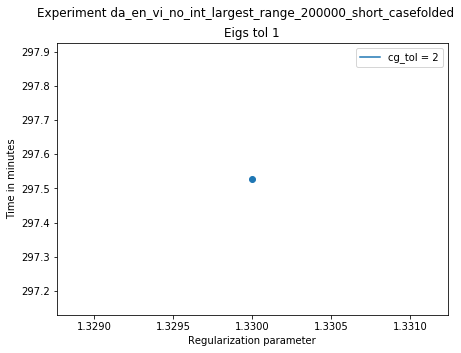

In [3]:
utils.plot_processing_time(experiment_id)

# Best run results

## Retireve experiment run using the experiment id and training parameters

In [4]:
experiment_id = 'da_en_vi_no_int_largest_range_200000_short_casefolded'
dimensions = 300
_lambda = 1.33 # regularization_parameter
cg_tol_1 = cg_tol_2 = 2 # 10 ** (-2)
eigs_tol_1 = eigs_tol_2 = 1 # 10 ** (0.3)
lang_codes_to_evaluate = ['da', 'vi', 'en']
target_concepts_suffix = "no_int_50_1000"
vocabulary_size = 200000

# The log file, that logs all the runs for a given experiment is named same as the experiment
# Finds the experiment id from the runs logger, and returns the matched line if return_line flag is set to true
experiment_run_id = utils.get_run_identifier(experiment_id, dimensions, _lambda, cg_tol_1, eigs_tol_1, cg_tol_2, eigs_tol_2, return_line = True)
print(experiment_run_id)
experiment_run_id = experiment_run_id[0]

eval_obj = evaluator.Evaluator(experiment_run_id, lang_codes_to_evaluate, vocabulary_size=vocabulary_size, test_set_flag = True, target_concepts_suffix = target_concepts_suffix)


('da_en_vi_no_int_largest_range_200000_short_casefolded_3', ['da_en_vi_no_int_largest_range_200000_short_casefolded_3 lambda 1.33 cg_tol 2.00 2.00 eigs_tol 1.00 1.00 dims 300'])
Validation dataset file name - extended da_en_it_vi_200000_lt_100_ut_700_ml_2_size_2000_inter_false_lang_codes_da_en_it_vi_tsf_true_suffix_no_int_50_1000
Validation dataset full name da_en_it_vi_200000_lt_100_ut_700_ml_2_size_2000_inter_false_lang_codes_da_en_it_vi_tsf_true_suffix_no_int_50_1000_da_en_vi_200000_through_en_lt_50_ut_1000_ml_2_da_en_it_vi_200000_lt_100_ut_700_ml_2_size_2000_inter_false_lang_codes_da_en_it_vi_casefolded
Final validation dataset file already generated. Exists as:  da_en_it_vi_200000_lt_100_ut_700_ml_2_size_2000_inter_false_lang_codes_da_en_it_vi_tsf_true_suffix_no_int_50_1000_da_en_vi_200000_through_en_lt_50_ut_1000_ml_2_da_en_it_vi_200000_lt_100_ut_700_ml_2_size_2000_inter_false_lang_codes_da_en_it_vi_casefolded
Running get_test_concepts_from_validation_set


## Important numbers

In [5]:
eval_obj.print_important_numbers()

*** Training phase ***
# Training documents: {'da': 60471, 'en': 141888, 'vi': 79636}
# Training sets vocabulary size: {'da': 154606, 'en': 200000, 'vi': 104182}

*** Evaluation phase ***
# Queries: {'en_vi': 1000, 'da_it': 1000, 'en_it': 1000, 'da_vi': 1000, 'it_vi': 1000, 'da_en': 1000}
# Target documents: {'vi': 152304, 'en': 202852, 'da': 140314}
# Evaluation datasets vocabulary size: {'vi': 104182, 'en': 193129, 'da': 154606}


## Precisions

In [9]:
dfs = {}
for emb_type in ['learned', 'baseline']:
    for metric in ['csls_knn_10', 'cosine']:
        print()
        s = '** Emb_type: {}, Metric: {} **'.format(emb_type, metric)
        print(s)
        print()
        df = eval_obj.get_overall_precision(emb_type=emb_type, metric=metric)
        dfs[s] = df
        display(df)


** Emb_type: learned, Metric: csls_knn_10 **

Embeddings type:  learned


,P@1,P@5,P@10
pair,,,
da_en,68.9,81.2,85.5
en_da,54.7,74.3,80.9
da_vi,29.6,49.4,59.2
vi_da,28.6,49.6,59.3
en_vi,54.4,73.7,79.5
vi_en,75.4,87.1,90.3



** Emb_type: learned, Metric: cosine **

Embeddings type:  learned


,P@1,P@5,P@10
pair,,,
da_en,63.8,76.6,81.5
en_da,58.0,74.3,79.9
da_vi,22.5,40.4,47.6
vi_da,25.2,45.3,53.4
en_vi,54.9,72.2,77.8
vi_en,71.6,84.1,87.2



** Emb_type: baseline, Metric: csls_knn_10 **

Embeddings type:  baseline


,P@1,P@5,P@10
pair,,,
da_en,43.0,61.1,68.1
en_da,32.1,50.2,57.7
da_vi,6.1,15.8,21.8
vi_da,10.9,21.8,28.5
en_vi,12.2,26.2,32.5
vi_en,25.4,42.4,49.9



** Emb_type: baseline, Metric: cosine **

Embeddings type:  baseline


,P@1,P@5,P@10
pair,,,
da_en,37.5,54.9,60.9
en_da,22.6,38.8,45.0
da_vi,3.8,10.6,13.9
vi_da,4.4,11.6,16.9
en_vi,7.7,16.4,20.6
vi_en,11.1,24.4,29.2


# Visualization 

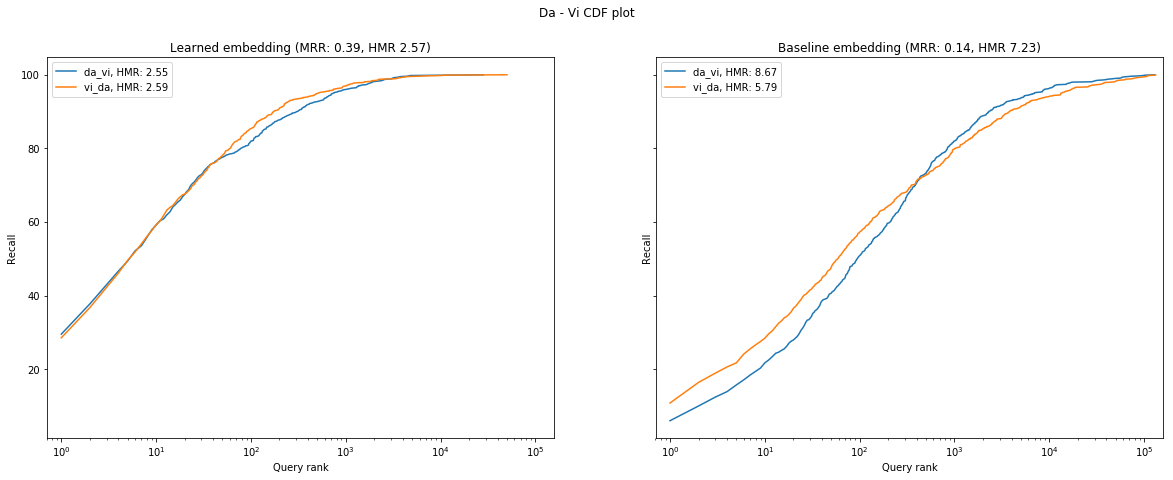

In [10]:
eval_obj.plot_ranking_count_cdf(lang_pair, 'learned', x_logscale=True, metric_learned = 'csls_knn_10', metric_baseline = 'csls_knn_10', ll_x = 0.15, hl_x = 5.2, path_to_dump='no_int_cdf')